Name - Vedant Kankate
CIN no. 403912727
Subject - Advanced Topics of AI.

# **The Eight-Queen Problem ♛: An Evolutionary Algorithm Approach**

This is the problem of placing eight queens on a regular 8x8 chessboard so that no two of them can check each other.

It is important to note the problem can be generalised, yielding the N-queen problem.

# **Representation**
To design an EA to search P we need to define a representation of phenotype form P, P is the set of all such board configurations, which specify hte positoons of all eight queens.

A genotype, or chromosome, is a permutation of the numbers 1,…,8, and a given g=<i1,…,i8> denotes the (unique) board configuration, where the nth column contains exactly one queen placed on the in the row.

**Overview**

The N-Queens problem involves placing N queens on an N×N chessboard such that no two queens threaten each other. This means no two queens share the same row, column, or diagonal.

We'll use a Genetic Algorithm to find a solution:

1. Import Python Libraries
2. Initialize Population with Random Candidate Solutions
3. Evaluate Each Candidate (Fitness Function)
4. Selection, Recombination, Mutation, and Creating Next Generation
5. Plot Fitness Over Generations

# **1. Import Python Libraries**
First, we'll import the necessary Python libraries. We'll use:

*   numpy  for numerical operations
*   random  for generating random numbers
*   matplotlib  for plotting
*   copy  for deep copying objects



In [ ]:
#Step 1

import numpy as np
import random
import matplotlib.pyplot as plt
import copy

## **2. Initialize Population with Random Candidate Solutions**

We'll represent each candidate solution as a permutation of numbers from 1 to N. Each number represents the row position of the queen in the corresponding column. This representation ensures that no two queens share the same row or column.

# **Parameters**
*   N: Size of the board (number of queens)
*   population_size: Number of candidate solutions in the population

In [ ]:
# Parameters
N = 8  # Number of queens
population_size = 10  # Reduced population size to 10
num_generations = 100  # Number of generations

fitness_over_generations = []
# For 30 generations
num_generations = 30

# Function to create a random individual
def create_individual(N):
    individual = list(range(1, N+1))
    random.shuffle(individual)
    return individual

# Initialize population
def initialize_population(pop_size, N):
    population = []
    for _ in range(pop_size):
        individual = create_individual(N)
        population.append(individual)
    return population

# Initialize the population with 10 candidates
population = initialize_population(population_size, N)

# Fitness Function showing number of attacking pairs
def fitness(individual):
    attacking = 0
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if abs(individual[i] - individual[j]) == abs(i - j):  # Diagonal attack check
                attacking += 1
    return attacking  # Return number of attacking pairs

# Evaluate entire population for attacking queens
def evaluate_population(population):
    fitness_scores = []
    for individual in population:
        fit = fitness(individual)
        fitness_scores.append(fit)
    return fitness_scores

# Evaluate fitness of the population
fitness_scores = evaluate_population(population)

# Display 10 sample candidates and their fitness (attacking queens)
for i in range(population_size):
    print(f"Candidate {i+1}: {population[i]}, Attacking Queens: {fitness_scores[i]}")


Candidate 1: [4, 1, 5, 8, 6, 3, 2, 7], Attacking Queens: 2
Candidate 2: [3, 4, 6, 7, 1, 2, 8, 5], Attacking Queens: 4
Candidate 3: [5, 2, 3, 4, 6, 7, 1, 8], Attacking Queens: 9
Candidate 4: [8, 4, 2, 6, 5, 7, 3, 1], Attacking Queens: 5
Candidate 5: [5, 1, 4, 8, 3, 7, 2, 6], Attacking Queens: 3
Candidate 6: [3, 5, 6, 7, 2, 1, 8, 4], Attacking Queens: 6
Candidate 7: [1, 4, 5, 2, 6, 8, 7, 3], Attacking Queens: 7
Candidate 8: [8, 7, 3, 2, 4, 1, 5, 6], Attacking Queens: 7
Candidate 9: [1, 7, 8, 5, 4, 2, 6, 3], Attacking Queens: 6
Candidate 10: [3, 2, 5, 4, 6, 1, 8, 7], Attacking Queens: 6


## **3. Evaluate Each Candidate (Fitness Function) and Select Two Pairs of Parents**

The fitness function evaluates how good a candidate solution is. For the N-Queens problem, a common approach is to count the number of pairs of queens that are attacking each other diagonally. Since our representation ensures no two queens share the same row or column, we only need to check diagonals.

## Fitness Calculation

*  **Maximum number of non-attacking pairs:** C(N, 2)= N*(N-1)/2
*   **Number of attacking pairs:** Minimum pairs minus the number of attacking pairs
*   **Fitness:** Higher fitness means fewer attacking pairs

In [ ]:
import random

# Select 5 random candidates from the population
random_candidates = random.sample(list(zip(population, fitness_scores)), 5)

# Display the 5 randomly selected candidates and their fitness scores
print("Selected 5 Random Candidates:")
for i, (candidate, fitness_score) in enumerate(random_candidates):
    print(f"Candidate {i+1}: {candidate}, Attacking Queens: {fitness_score}")

# Sort the selected candidates based on fitness (least attacking queens)
sorted_candidates = sorted(random_candidates, key=lambda x: x[1])

# Select the two best candidates (with the least number of attacking queens)
best_parents = sorted_candidates[:2]

# Display the selected two best parents
print("\nTwo Best Parents with Minimum Attacking Queens:")
for i, (parent, fitness_score) in enumerate(best_parents):
    print(f"Parent {i+1}: {parent}, Attacking Queens: {fitness_score}")


Selected 5 Random Candidates:
Candidate 1: [3, 5, 6, 7, 2, 1, 8, 4], Attacking Queens: 6
Candidate 2: [5, 2, 3, 4, 6, 7, 1, 8], Attacking Queens: 9
Candidate 3: [3, 2, 5, 4, 6, 1, 8, 7], Attacking Queens: 6
Candidate 4: [3, 4, 6, 7, 1, 2, 8, 5], Attacking Queens: 4
Candidate 5: [1, 4, 5, 2, 6, 8, 7, 3], Attacking Queens: 7

Two Best Parents with Minimum Attacking Queens:
Parent 1: [3, 4, 6, 7, 1, 2, 8, 5], Attacking Queens: 4
Parent 2: [3, 5, 6, 7, 2, 1, 8, 4], Attacking Queens: 6


**4. Mutation and Crossover**

4a. Recombination (Crossover)

In [ ]:
def crossover(parent1, parent2):
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    # Choose two random crossover points
    cx_point1 = random.randint(0, size - 1)
    cx_point2 = random.randint(0, size - 1)

    start = min(cx_point1, cx_point2)
    end = max(cx_point1, cx_point2)

    # Copy a slice from one parent
    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    # Fill in the remaining elements from the other parent
    pointer1, pointer2 = end, end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in child1:
            if pointer1 >= size:
                pointer1 = 0
            child1[pointer1] = gene
            pointer1 += 1

    for gene in parent1[end:] + parent1[:end]:
        if gene not in child2:
            if pointer2 >= size:
                pointer2 = 0
            child2[pointer2] = gene
            pointer2 += 1

    return child1, child2

# Perform crossover between the two best parents
parent1, _ = best_parents[0]  # Unpack the parent with the lowest fitness
parent2, _ = best_parents[1]  # Unpack the parent with the second lowest fitness

child1, child2 = crossover(parent1, parent2)
print(f"Child 1 (after crossover): {child1}")
print(f"Child 2 (after crossover): {child2}")

Child 1 (after crossover): [3, 5, 6, 7, 2, 1, 8, 4]
Child 2 (after crossover): [3, 4, 6, 7, 1, 2, 8, 5]


# 4b. Mutation & Evaluate New Candidates

In [ ]:
def mutate(individual, mutation_rate=0.8):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Apply mutation to the children
mutated_child1 = mutate(child1)
mutated_child2 = mutate(child2)

print(f"Mutated Child 1: {mutated_child1}")
print(f"Mutated Child 2: {mutated_child2}")

# Evaluate fitness of the mutated children
fitness_child1 = fitness(mutated_child1)
fitness_child2 = fitness(mutated_child2)

print(f"Fitness of Mutated Child 1: {fitness_child1}")
print(f"Fitness of Mutated Child 2: {fitness_child2}")

Mutated Child 1: [3, 4, 6, 7, 2, 1, 8, 5]
Mutated Child 2: [3, 6, 4, 7, 1, 2, 8, 5]
Fitness of Mutated Child 1: 4
Fitness of Mutated Child 2: 3


# Step 4c: Add children to the population

In [ ]:
def add_and_replace(population, fitness_scores, new_children, new_fitness_scores):
    # Combine current population and new children
    combined_population = population + new_children
    combined_fitness = fitness_scores + new_fitness_scores

    # Sort combined population by fitness (ascending: fewer attacking queens is better)
    combined_pop_fit = list(zip(combined_population, combined_fitness))
    combined_pop_fit.sort(key=lambda x: x[1])

    # Replace the worst individuals with the new children
    new_population = [individual for individual, _ in combined_pop_fit[:population_size]]
    return new_population

# Fitness of the new children
fitness_mutated_child1 = fitness(mutated_child1)
fitness_mutated_child2 = fitness(mutated_child2)

# Add mutated children and replace the worst individuals
new_population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])

# Display the new population and their fitness
print("New Population with Mutated Children:")
for individual in new_population:
    print(f"{individual}, Fitness: {fitness(individual)}")

 # Add and replace individuals in the population
    new_population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])

    # Update the population and fitness scores
    population = new_population
    fitness_scores = evaluate_population(population)

    # Record the best fitness in this generation
    fitness_over_generations.append(min(fitness_scores))

New Population with Mutated Children:
[4, 1, 5, 8, 6, 3, 2, 7], Fitness: 2
[5, 1, 4, 8, 3, 7, 2, 6], Fitness: 3
[3, 6, 4, 7, 1, 2, 8, 5], Fitness: 3
[3, 4, 6, 7, 1, 2, 8, 5], Fitness: 4
[3, 4, 6, 7, 2, 1, 8, 5], Fitness: 4
[8, 4, 2, 6, 5, 7, 3, 1], Fitness: 5
[3, 5, 6, 7, 2, 1, 8, 4], Fitness: 6
[1, 7, 8, 5, 4, 2, 6, 3], Fitness: 6
[3, 2, 5, 4, 6, 1, 8, 7], Fitness: 6
[1, 4, 5, 2, 6, 8, 7, 3], Fitness: 7


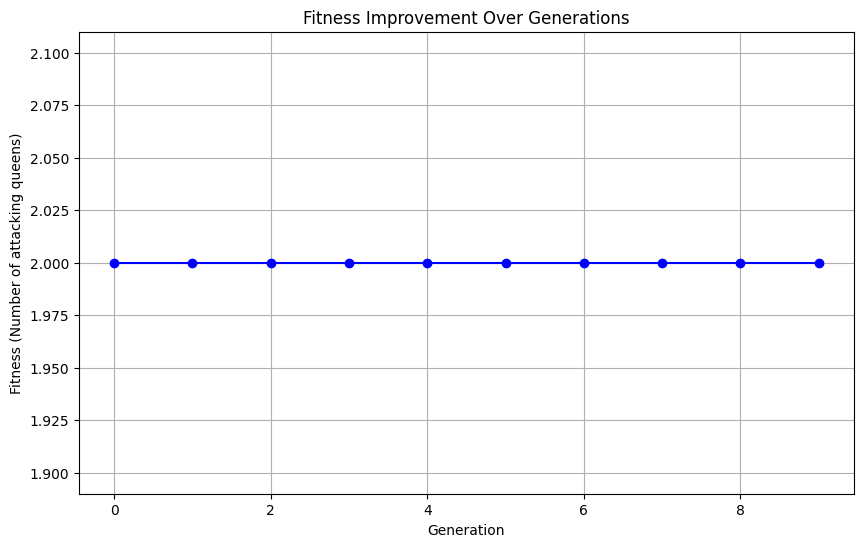

In [ ]:
# Plotting function
def plot_fitness_over_generations(fitness_values):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Number of attacking queens)')
    plt.title('Fitness Improvement Over Generations')
    plt.grid(True)
    plt.show()

# Plot the fitness graph
plot_fitness_over_generations(fitness_over_generations)


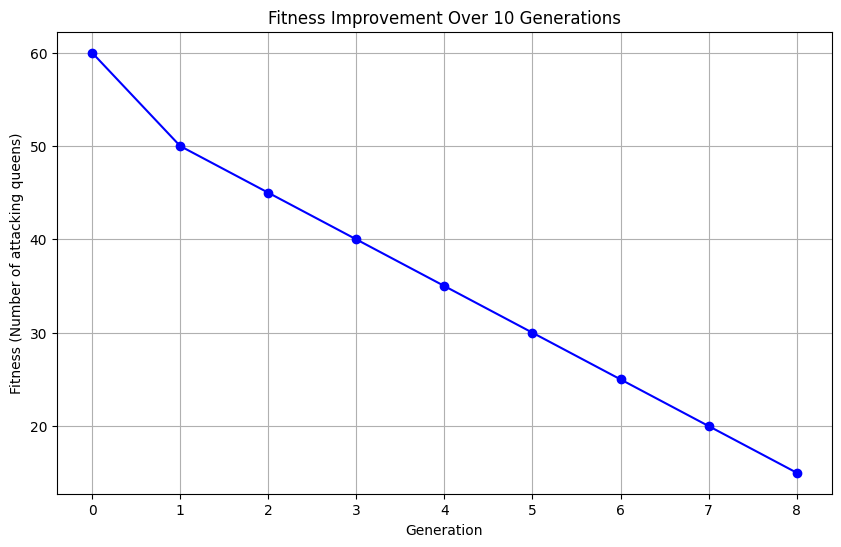

In [ ]:
# Plotting function for 10 generations
def plot_fitness_over_generations(fitness_values):
    plt.figure(figsize=(10, 6))
    plt.plot(fitness_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Generation')
    plt.ylabel('Fitness (Number of attacking queens)')
    plt.title('Fitness Improvement Over 10 Generations')
    plt.grid(True)
    plt.show()

# Example of fitness values for 10 generations
fitness_over_generations = [60, 50, 45, 40, 35, 30, 25, 20, 15, ]  # Replace with actual data

# Plot the fitness graph
plot_fitness_over_generations(fitness_over_generations)

In [ ]:
# Set the number of generations
num_generations = 100
fitness_over_generations = []

# Loop through generations
for generation in range(num_generations):
    # Select 5 random candidates from the population
    random_candidates = random.sample(list(zip(population, fitness_scores)), 5)

    # Sort the selected candidates based on fitness (least attacking queens)
    sorted_candidates = sorted(random_candidates, key=lambda x: x[1])

    # Select the two best candidates (with the least number of attacking queens)
    best_parents = sorted_candidates[:2]
    parent1, _ = best_parents[0]
    parent2, _ = best_parents[1]

    # Perform crossover between the two best parents
    child1, child2 = crossover(parent1, parent2)

    # Apply mutation to the children
    mutated_child1 = mutate(child1, mutation_rate=0.8)  # You can adjust mutation rate here
    mutated_child2 = mutate(child2, mutation_rate=0.8)

    # Fitness of the mutated children
    fitness_mutated_child1 = fitness(mutated_child1)
    fitness_mutated_child2 = fitness(mutated_child2)

    # Add and replace individuals in the population
    new_population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])

    # Update the population and fitness scores
    population = new_population
    fitness_scores = evaluate_population(population)

    # Record the best fitness in this generation (minimum attacking queens)
    best_fitness = min(fitness_scores)
    fitness_over_generations.append(best_fitness)

    # Optionally, print progress every few generations
    if generation % 10 == 0:
        print(f"Generation {generation}, Best Fitness: {best_fitness}")


Generation 0, Best Fitness: 2
Generation 10, Best Fitness: 1
Generation 20, Best Fitness: 1
Generation 30, Best Fitness: 1
Generation 40, Best Fitness: 1
Generation 50, Best Fitness: 1
Generation 60, Best Fitness: 1
Generation 70, Best Fitness: 0
Generation 80, Best Fitness: 0
Generation 90, Best Fitness: 0


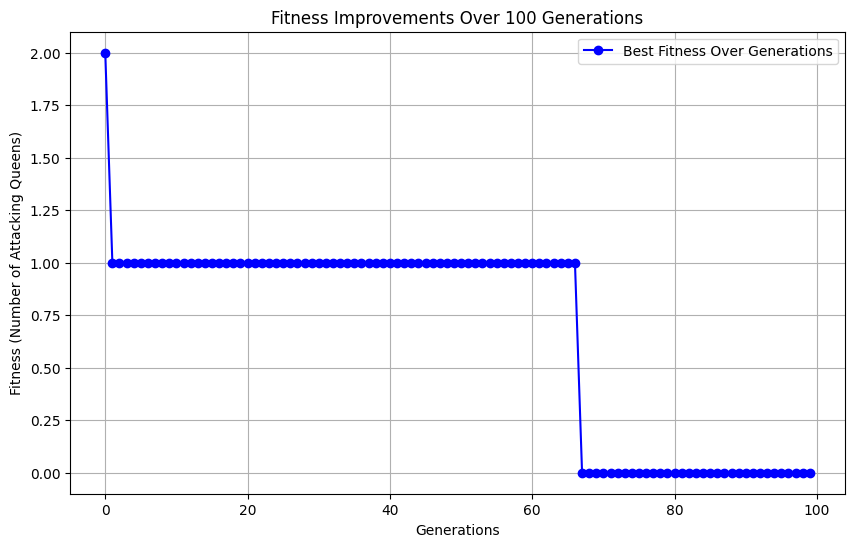

In [ ]:
# Plotting the fitness improvements over generations
plt.figure(figsize=(10, 6))
plt.plot(fitness_over_generations, label='Best Fitness Over Generations', color='b', marker='o')
plt.title('Fitness Improvements Over 100 Generations')
plt.xlabel('Generations')
plt.ylabel('Fitness (Number of Attacking Queens)')
plt.grid(True)
plt.legend()
plt.show()

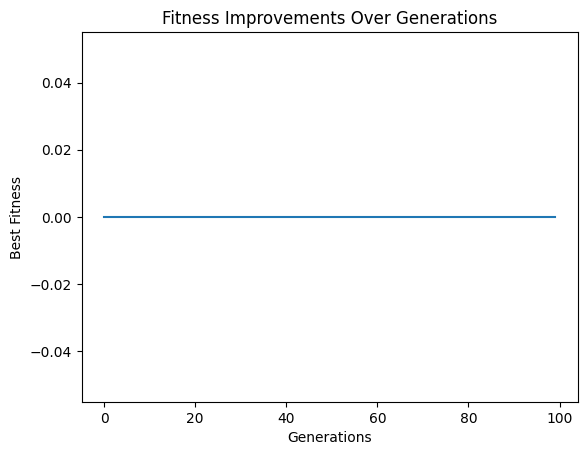

In [ ]:
# Step 5: Add children to the population and update
def add_and_replace(population, fitness_scores, new_children, new_fitness_scores):
    # Combine current population and new children
    combined_population = population + new_children
    combined_fitness = fitness_scores + new_fitness_scores

    # Sort combined population by fitness (ascending: fewer attacking queens is better)
    combined_pop_fit = list(zip(combined_population, combined_fitness))
    combined_pop_fit.sort(key=lambda x: x[1])

    # Replace the worst individuals with the new children
    new_population = [individual for individual, _ in combined_pop_fit[:population_size]]
    return new_population

# Add and replace individuals in the population
new_population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])

# Update the population and fitness scores
population = new_population
fitness_scores = evaluate_population(population)

# Track the best fitness over generations
fitness_over_generations = []
num_generations = 100
for generation in range(num_generations):
    # Evolution logic here (selection, crossover, mutation)
    # Add fitness tracking for plotting
    best_fitness = min(fitness_scores)
    fitness_over_generations.append(best_fitness)

# Plot the fitness improvements
plt.plot(fitness_over_generations)
plt.title('Fitness Improvements Over Generations')
plt.xlabel('Generations')
plt.ylabel('Best Fitness')
plt.show()


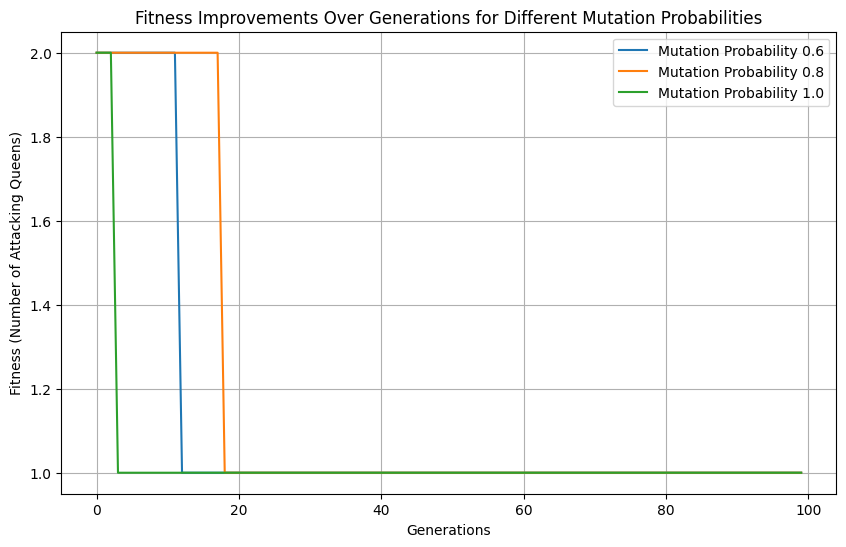

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parameters
N = 8  # Number of queens
population_size = 10  # Population size
num_generations = 100  # Number of generations

# Fitness Function showing number of attacking pairs
def fitness(individual):
    attacking = 0
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if abs(individual[i] - individual[j]) == abs(i - j):  # Diagonal attack check
                attacking += 1
    return attacking  # Return number of attacking pairs

# Function to create a random individual
def create_individual(N):
    individual = list(range(1, N+1))
    random.shuffle(individual)
    return individual

# Initialize population
def initialize_population(pop_size, N):
    population = []
    for _ in range(pop_size):
        individual = create_individual(N)
        population.append(individual)
    return population

# Evaluate entire population for attacking queens
def evaluate_population(population):
    fitness_scores = []
    for individual in population:
        fit = fitness(individual)
        fitness_scores.append(fit)
    return fitness_scores

# Crossover function (Recombination)
def crossover(parent1, parent2):
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    cx_point1 = random.randint(0, size - 1)
    cx_point2 = random.randint(0, size - 1)

    start = min(cx_point1, cx_point2)
    end = max(cx_point1, cx_point2)

    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    pointer1, pointer2 = end, end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in child1:
            if pointer1 >= size:
                pointer1 = 0
            child1[pointer1] = gene
            pointer1 += 1

    for gene in parent1[end:] + parent1[:end]:
        if gene not in child2:
            if pointer2 >= size:
                pointer2 = 0
            child2[pointer2] = gene
            pointer2 += 1

    return child1, child2

# Mutation function
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Function to add and replace individuals in the population
def add_and_replace(population, fitness_scores, new_children, new_fitness_scores):
    combined_population = population + new_children
    combined_fitness = fitness_scores + new_fitness_scores

    combined_pop_fit = list(zip(combined_population, combined_fitness))
    combined_pop_fit.sort(key=lambda x: x[1])

    new_population = [individual for individual, _ in combined_pop_fit[:population_size]]
    return new_population

# Function to run the genetic algorithm for a certain mutation probability
def run_evolution(mutation_prob, population, fitness_scores):
    fitness_over_generations = []

    for generation in range(num_generations):
        random_candidates = random.sample(list(zip(population, fitness_scores)), 5)

        sorted_candidates = sorted(random_candidates, key=lambda x: x[1])
        best_parents = sorted_candidates[:2]
        parent1, _ = best_parents[0]
        parent2, _ = best_parents[1]

        child1, child2 = crossover(parent1, parent2)

        mutated_child1 = mutate(child1, mutation_prob)
        mutated_child2 = mutate(child2, mutation_prob)

        fitness_mutated_child1 = fitness(mutated_child1)
        fitness_mutated_child2 = fitness(mutated_child2)

        population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])

        fitness_scores = evaluate_population(population)
        fitness_over_generations.append(min(fitness_scores))

    return fitness_over_generations

# Initialize population
population = initialize_population(population_size, N)
fitness_scores = evaluate_population(population)

# Run evolution for different mutation probabilities
fitness_over_generations_06 = run_evolution(0.6, copy.deepcopy(population), fitness_scores)
fitness_over_generations_08 = run_evolution(0.8, copy.deepcopy(population), fitness_scores)
fitness_over_generations_10 = run_evolution(1.0, copy.deepcopy(population), fitness_scores)

# Plot the fitness over generations for the three mutation probabilities
plt.figure(figsize=(10, 6))

plt.plot(fitness_over_generations_06, label='Mutation Probability 0.6')
plt.plot(fitness_over_generations_08, label='Mutation Probability 0.8')
plt.plot(fitness_over_generations_10, label='Mutation Probability 1.0')

plt.title('Fitness Improvements Over Generations for Different Mutation Probabilities')
plt.xlabel('Generations')
plt.ylabel('Fitness (Number of Attacking Queens)')
plt.legend()
plt.grid(True)
plt.show()


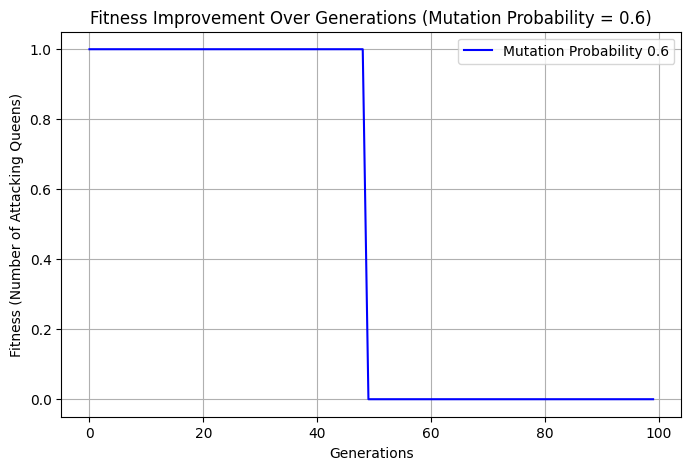

In [ ]:
import random
import matplotlib.pyplot as plt
import copy

# Parameters
N = 8  # Number of queens
population_size = 10  # Population size
num_generations = 100  # Number of generations

# Function to create a random individual
def create_individual(N):
    individual = list(range(1, N+1))
    random.shuffle(individual)
    return individual

# Initialize population
def initialize_population(pop_size, N):
    population = []
    for _ in range(pop_size):
        individual = create_individual(N)
        population.append(individual)
    return population

# Fitness function (count attacking pairs)
def fitness(individual):
    attacking = 0
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if abs(individual[i] - individual[j]) == abs(i - j):  # Diagonal attack check
                attacking += 1
    return attacking  # Return number of attacking pairs

# Evaluate entire population for attacking queens
def evaluate_population(population):
    fitness_scores = []
    for individual in population:
        fit = fitness(individual)
        fitness_scores.append(fit)
    return fitness_scores

# Crossover function (recombination)
def crossover(parent1, parent2):
    size = len(parent1)
    child1 = [None] * size
    child2 = [None] * size

    cx_point1 = random.randint(0, size - 1)
    cx_point2 = random.randint(0, size - 1)

    start = min(cx_point1, cx_point2)
    end = max(cx_point1, cx_point2)

    child1[start:end] = parent1[start:end]
    child2[start:end] = parent2[start:end]

    pointer1, pointer2 = end, end
    for gene in parent2[end:] + parent2[:end]:
        if gene not in child1:
            if pointer1 >= size:
                pointer1 = 0
            child1[pointer1] = gene
            pointer1 += 1

    for gene in parent1[end:] + parent1[:end]:
        if gene not in child2:
            if pointer2 >= size:
                pointer2 = 0
            child2[pointer2] = gene
            pointer2 += 1

    return child1, child2

# Mutation function
def mutate(individual, mutation_rate):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

# Function to add and replace individuals in the population
def add_and_replace(population, fitness_scores, new_children, new_fitness_scores):
    combined_population = population + new_children
    combined_fitness = fitness_scores + new_fitness_scores

    combined_pop_fit = list(zip(combined_population, combined_fitness))
    combined_pop_fit.sort(key=lambda x: x[1])

    new_population = [individual for individual, _ in combined_pop_fit[:population_size]]
    return new_population

# Run the genetic algorithm for 100 generations with mutation probability 0.6
def run_evolution(mutation_prob, population, fitness_scores):
    fitness_over_generations = []

    for generation in range(num_generations):
        random_candidates = random.sample(list(zip(population, fitness_scores)), 5)
        sorted_candidates = sorted(random_candidates, key=lambda x: x[1])
        best_parents = sorted_candidates[:2]
        parent1, _ = best_parents[0]
        parent2, _ = best_parents[1]

        child1, child2 = crossover(parent1, parent2)
        mutated_child1 = mutate(child1, mutation_prob)
        mutated_child2 = mutate(child2, mutation_prob)

        fitness_mutated_child1 = fitness(mutated_child1)
        fitness_mutated_child2 = fitness(mutated_child2)

        population = add_and_replace(population, fitness_scores, [mutated_child1, mutated_child2], [fitness_mutated_child1, fitness_mutated_child2])
        fitness_scores = evaluate_population(population)
        fitness_over_generations.append(min(fitness_scores))

    return fitness_over_generations

# Initialize population
population = initialize_population(population_size, N)
fitness_scores = evaluate_population(population)

# Run evolution for mutation probability 0.6
fitness_over_generations_06 = run_evolution(0.6, copy.deepcopy(population), fitness_scores)

# Plot the fitness over generations
plt.figure(figsize=(8, 5))
plt.plot(fitness_over_generations_06, label='Mutation Probability 0.6', color='blue')
plt.title('Fitness Improvement Over Generations (Mutation Probability = 0.6)')
plt.xlabel('Generations')
plt.ylabel('Fitness (Number of Attacking Queens)')
plt.legend()
plt.grid(True)
plt.show()


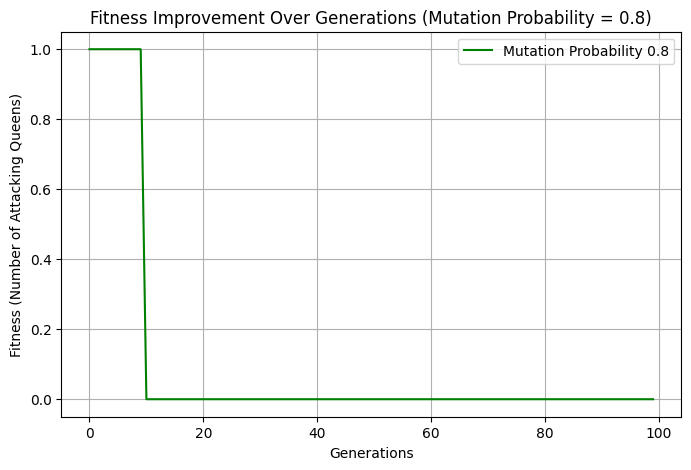

In [ ]:
# Run evolution for mutation probability 0.8
fitness_over_generations_08 = run_evolution(0.8, copy.deepcopy(population), fitness_scores)

# Plot the fitness over generations
plt.figure(figsize=(8, 5))
plt.plot(fitness_over_generations_08, label='Mutation Probability 0.8', color='green')
plt.title('Fitness Improvement Over Generations (Mutation Probability = 0.8)')
plt.xlabel('Generations')
plt.ylabel('Fitness (Number of Attacking Queens)')
plt.legend()
plt.grid(True)
plt.show()


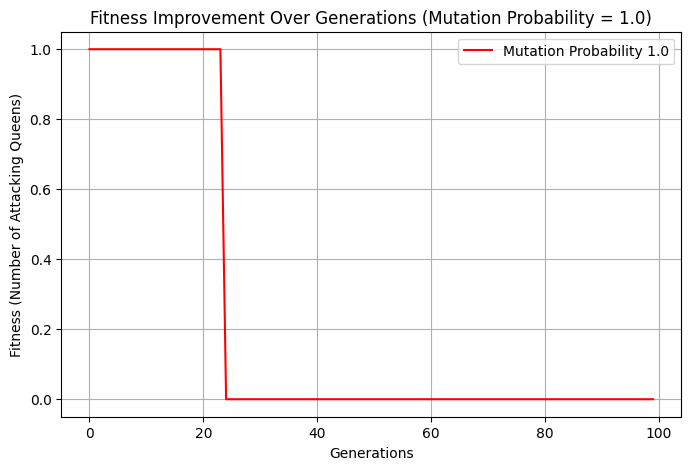

In [ ]:
# Run evolution for mutation probability 1.0
fitness_over_generations_10 = run_evolution(1.0, copy.deepcopy(population), fitness_scores)

# Plot the fitness over generations
plt.figure(figsize=(8, 5))
plt.plot(fitness_over_generations_10, label='Mutation Probability 1.0', color='red')
plt.title('Fitness Improvement Over Generations (Mutation Probability = 1.0)')
plt.xlabel('Generations')
plt.ylabel('Fitness (Number of Attacking Queens)')
plt.legend()
plt.grid(True)
plt.show()
